In [8]:
import sys
sys.path.append(r'D:\Usuario\Pablo\Escritorio\workspace\metodos_numericos')

import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
from codigo import *
from modulos.menu import menu

In [9]:
Presicion().cambiarPresicionRepresentacion(0.0001)
Presicion.presicionActual()

4

In [10]:
menu("Método interpolador de Newton")


		████████████████████████████████████████████████████████████████████████████████████████████████████
		███                                                                                              ███
		███                                Método interpolador de Newton                                 ███
		███                                                                                              ███
		███               Integrantes: Sol Lopez, Pablo Foglia, Juan Caceffo, Alejo Menini               ███
		███                                                                                              ███
		████████████████████████████████████████████████████████████████████████████████████████████████████





In [11]:
lista_puntos = np.array([(-2,-3),(-1,1),(0,2),(1,5),(2,7),(3,8)]) #ACA CARGAR LOS PUNTOS DEL PARCIAL
lista_puntos

array([[-2, -3],
       [-1,  1],
       [ 0,  2],
       [ 1,  5],
       [ 2,  7],
       [ 3,  8]])

In [12]:
min_x = np.min(lista_puntos[:, 0])
print(f"Valor más pequeño en x: {min_x}")

Valor más pequeño en x: -2


In [13]:
poliNewton = NEquation(lista_puntos)
print("El polinomio generado es el siguiente: ")
poliNewton.imprimirEcuacion()

El polinomio generado es el siguiente: 


x*(0.0917*x + 0.1834)*(x - 2)*(x - 1)*(x + 1) - x*(0.3333*x + 0.6666)*(x - 1)*(x + 1) + x*(0.8333*x + 1.6666)*(x + 1) + 4.0*x - (x + 1)*(1.5*x + 3.0) + 5.0

In [14]:
gradoPolinomio = testeoGrado(lista_puntos, poliNewton.imprimirEcuacion())
print(f"El grado del polinomio obtendio es: {gradoPolinomio}")

El grado del polinomio obtendio es: 5


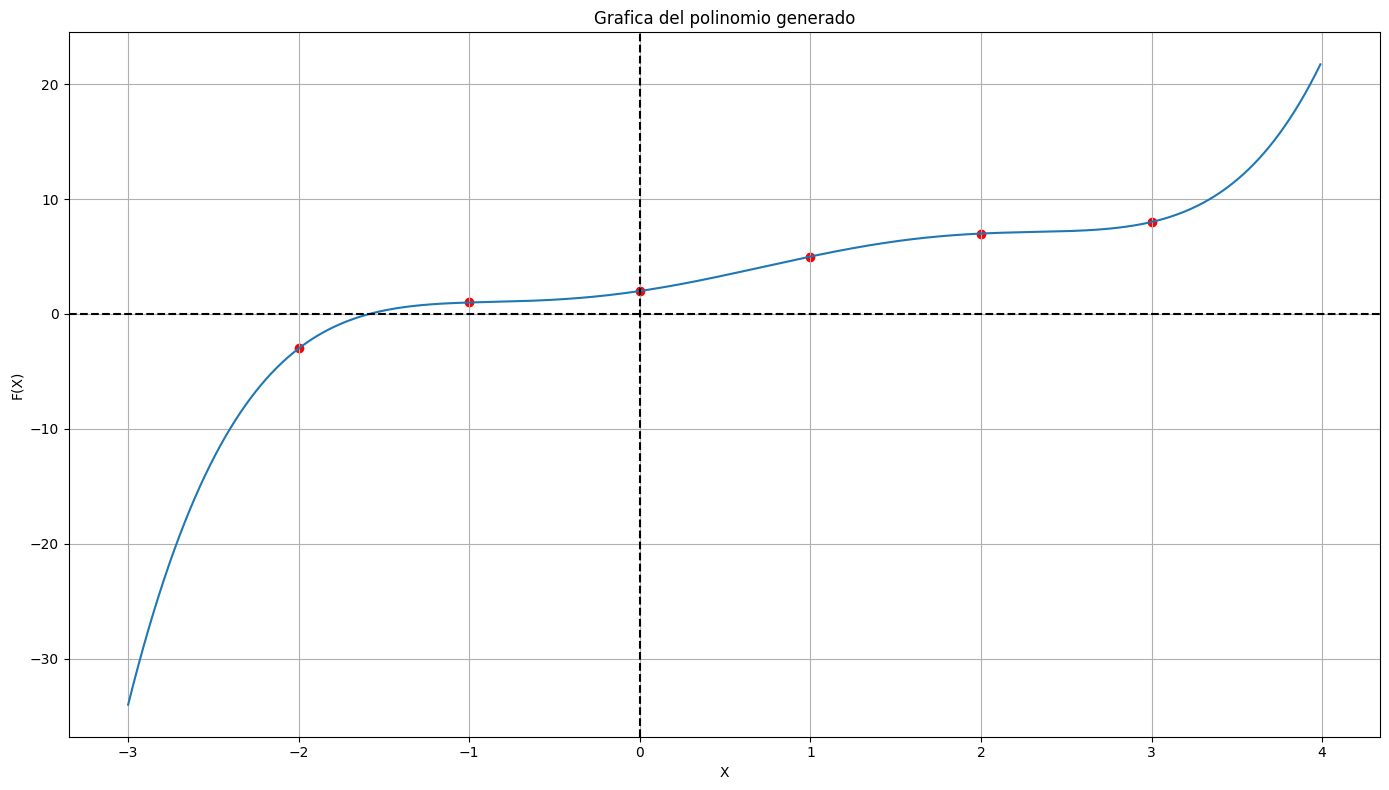

In [15]:
PUNTOS_X =[punto[0] for punto in lista_puntos]
PUNTOS_Y = [punto[1] for punto in lista_puntos]
graficar(PUNTOS_X, PUNTOS_Y, poliNewton.equation(), "Grafica del polinomio generado")

In [16]:

RAIZ = aproximarRaiz(min_x,Presicion.presicionActualEnDecimal(),poliNewton.equation())
print(f'Una de las raices de la función es: {RAIZ}')

Una de las raices de la función es: -1.5858


In [17]:

print("Polinomio de Larange con el mismo set de datos: ")
poli_larange = generar_funcion_lagrange(lista_puntos)
poli_larange

Polinomio de Larange con el mismo set de datos: 


-x*(1/3 - x/3)*(1/2 - x/4)*(3/5 - x/5)*(3*x + 3)/2 - x*(1/2 - x/2)*(2/3 - x/3)*(3/4 - x/4)*(x + 2) + x*(3/2 - x/2)*(2 - x)*(x/2 + 1/2)*(5*x/3 + 10/3) + x*(3 - x)*(x/3 + 1/3)*(x - 1)*(7*x/4 + 7/2)/2 + x*(x/4 + 1/4)*(x/2 - 1/2)*(x - 2)*(8*x/5 + 16/5)/3 + (1 - x)*(1 - x/2)*(1 - x/3)*(x + 1)*(x + 2)

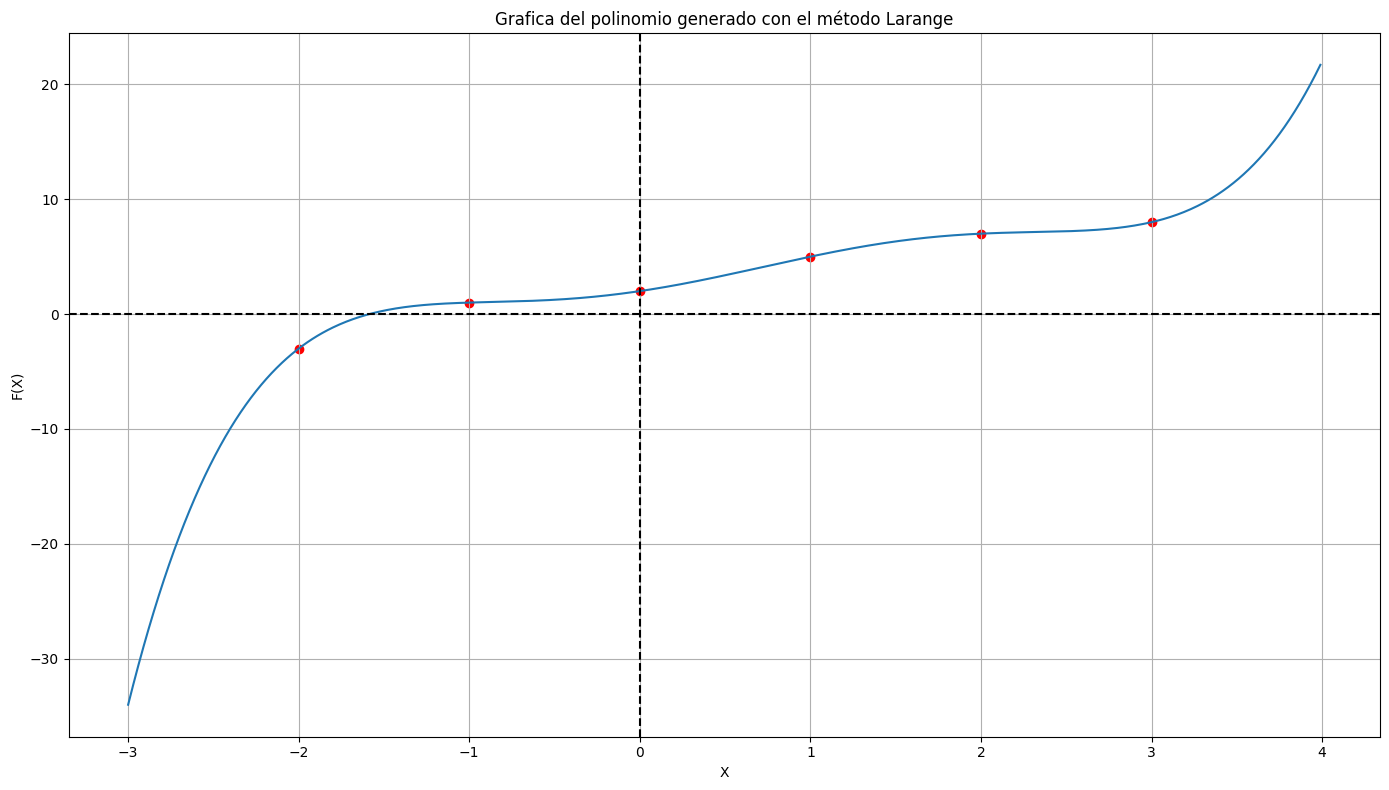

In [18]:
x = sp.symbols('x')
fLarange = sp.lambdify(x, poli_larange, modules=['numpy'] )

graficar(PUNTOS_X, PUNTOS_Y, fLarange, "Grafica del polinomio generado con el método Larange")